# Question 1: Are there certain areas or states where it is more likely to have a customer churn?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('/Users/mahmoud/Documents/Project_3/data.csv')

df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2682,DC,55,510,354-5058,yes,no,0,106.1,77,...,100,10.50,96.4,92,4.34,12.9,3,3.48,0,False
1,3304,IL,71,510,330-7137,yes,no,0,186.1,114,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
2,757,UT,112,415,358-5953,no,no,0,115.8,108,...,111,20.68,184.6,78,8.31,13.1,5,3.54,1,False
3,2402,NY,77,415,388-9285,no,yes,33,143.0,101,...,102,18.04,104.9,120,4.72,15.3,4,4.13,5,True
4,792,NV,69,510,397-6789,yes,yes,33,271.5,98,...,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True


In [8]:
t_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

t_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [9]:
test_df = t_df.drop(columns=['Unnamed: 0'])

In [10]:
test_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,IN,68,415,386-9724,no,no,0,222.1,107,37.76,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,MI,102,510,336-4656,no,no,0,102.6,89,17.44,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,AZ,72,510,407-9830,no,no,0,272.4,88,46.31,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,OK,52,408,389-4780,no,no,0,214.7,68,36.50,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,FL,84,510,341-3180,no,no,0,191.0,88,32.47,...,119,27.10,247.3,79,11.13,6.5,4,1.76,0,False
330,WI,93,415,392-6286,no,no,0,152.1,141,25.86,...,107,18.32,262.4,111,11.81,12.0,7,3.24,1,False
331,MI,61,415,349-5617,no,yes,33,270.7,53,46.02,...,116,17.06,201.7,102,9.08,10.9,3,2.94,3,False
332,CA,37,415,345-1243,no,no,0,191.1,69,32.49,...,113,10.98,207.5,117,9.34,12.9,1,3.48,0,False


In [12]:
tr_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

tr_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [13]:
train_df = tr_df.drop(columns=['Unnamed: 0'])

In [14]:
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,IN,68,415,386-9724,no,no,0,222.1,107,37.76,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,MI,102,510,336-4656,no,no,0,102.6,89,17.44,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,AZ,72,510,407-9830,no,no,0,272.4,88,46.31,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,OK,52,408,389-4780,no,no,0,214.7,68,36.50,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,FL,84,510,341-3180,no,no,0,191.0,88,32.47,...,119,27.10,247.3,79,11.13,6.5,4,1.76,0,False
330,WI,93,415,392-6286,no,no,0,152.1,141,25.86,...,107,18.32,262.4,111,11.81,12.0,7,3.24,1,False
331,MI,61,415,349-5617,no,yes,33,270.7,53,46.02,...,116,17.06,201.7,102,9.08,10.9,3,2.94,3,False
332,CA,37,415,345-1243,no,no,0,191.1,69,32.49,...,113,10.98,207.5,117,9.34,12.9,1,3.48,0,False


In [15]:
# Fiding Unique states 
display(train_df['state'].unique())
display(train_df['area code'].unique())

array(['IN', 'MI', 'AZ', 'TN', 'OK', 'NE', 'UT', 'NY', 'NJ', 'SC', 'VA',
       'FL', 'ND', 'AL', 'GA', 'VT', 'NM', 'ME', 'DE', 'CA', 'WI', 'ID',
       'KY', 'HI', 'MD', 'CT', 'MN', 'MA', 'MO', 'WV', 'OR', 'KS', 'MS',
       'PA', 'WA', 'DC', 'NH', 'TX', 'IL', 'AR', 'MT', 'RI', 'SD', 'IA',
       'LA', 'NV', 'AK', 'NC', 'CO', 'OH', 'WY'], dtype=object)

array([415, 510, 408])

In [16]:
churn_by_state = train_df.groupby('state')['churn'].value_counts(normalize=True)
churn_by_state = pd.DataFrame(churn_by_state)
churn_by_state.columns = ['value']
churn_by_state = churn_by_state.reset_index()

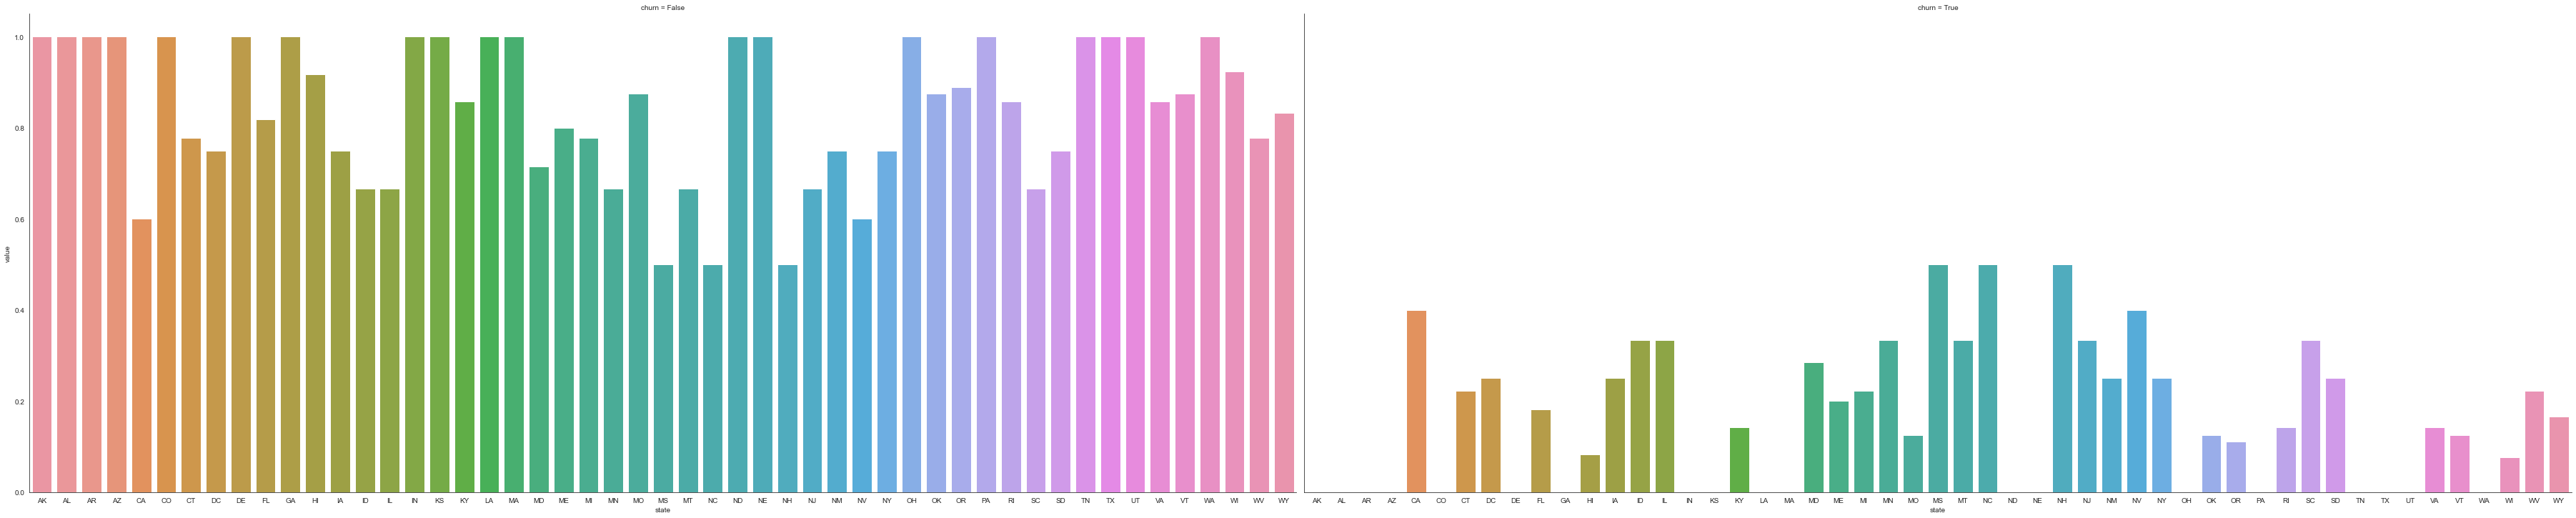

In [59]:
sns.catplot(
    data=churn_by_state, x="state", y="value", col="churn",
    kind="bar", height=10, aspect=2.5,
)

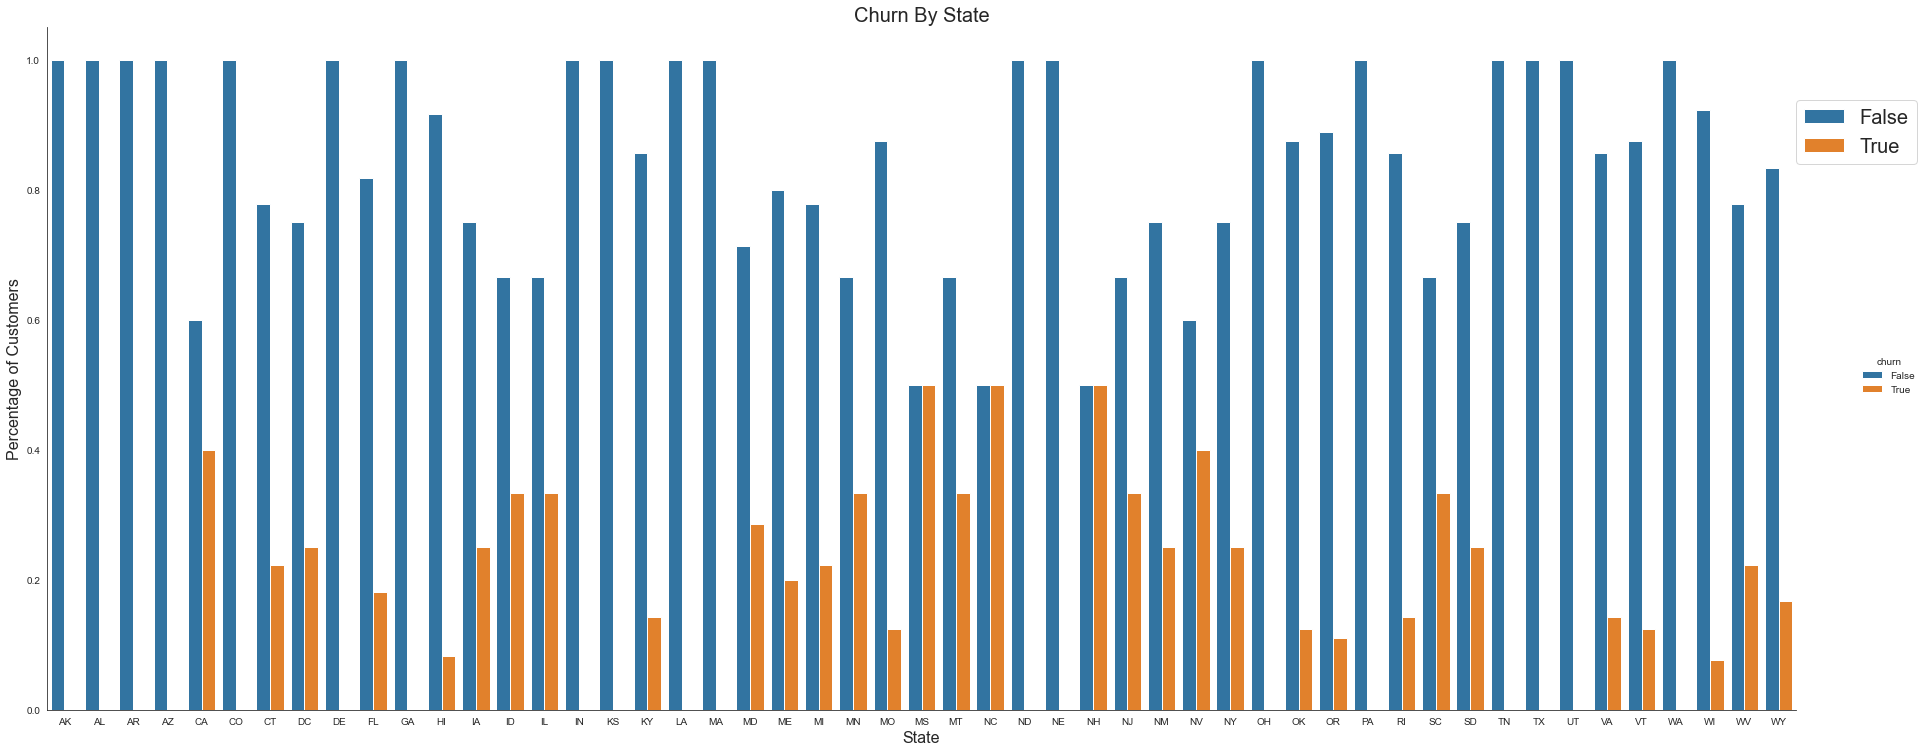

In [58]:
sns.catplot(
    data=churn_by_state, x="state", y="value", hue="churn",
    kind="bar", height=10, aspect=2.5,
)

plt.title('Churn By State', fontsize=20)
plt.ylabel('Percentage of Customers', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.legend(loc=(1, .8), fontsize=20)

# States that churn
CA, CT, DC, FL, HI, IA, ID, IL, KY, MD, ME, MI, MN, MO, MS, MT, NC, NH, NJ, NM, NV, NY, OK, OR, RI, SC, SD, VA, VT, WI, WV, WY

# How many people are in those states that churn, is there a ratio?

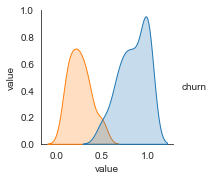

In [64]:
sns.pairplot(churn_by_state, hue="churn")